# BIOS 470/570 Lecture 11

## Last time we covered:
* ### Introduction to scRNA seq data

## Today we will cover:
* ### Introduction to scanpy: data proprocessing and basic exploration

#### I strongly recommend that you create a new environment for the single cell rna seq. You can create a new environment and install packages in it by running:
conda create -n bios_scanpy -c conda-forge scanpy jupyterlab python-igraph leidenalg

#### Essentially all of the packages we have looked at (numpy, pandas scipy, matplotlib, seaborn) are dependencies of these and will be install in the new environment

#### then activate this environment by:
conda activate bios_scanpy

#### The standard convention for importing scanpy is "as sc"

In [9]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio as iio

### scanpy is based around a datastructure call anndata (for annotated data). The main data matrix (off transcript counts for each sample are stored in a numpy matrix accessed by .X. There is a dataframe for features of variables (genes) accessed by .var and a dataframe for properties of observations (cells), accessed by .obs. Additional data that is not associated with a cell or a gene is stored in .uns which is a python dictionary. 

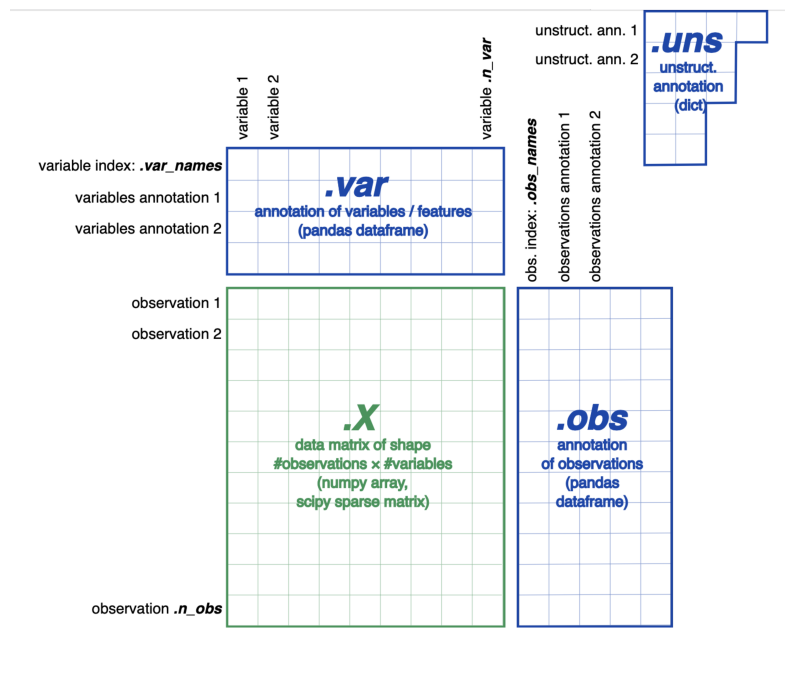

In [18]:
# Show the anndata diagram:
anndata_image = iio.v3.imread('/Users/aw21/Dropbox (Personal)/anndata.png') #read the image
plt.figure(figsize=(10,10))
plt.imshow(anndata_image); #show the image
plt.axis('off'); # don't show the axes around the image

### scanpy is dividing into three basic parts. data preprocessesing (functions accessed from sc.pp), data analysis tools (sc.tl), and plotting functions (sc.pl). 

### today we will look at (part of) a typical workflow on a published dataset from [here]():
